In [4]:
import itertools
import numpy as np
import random
import pickle
import matplotlib.pyplot as plt
from math import *
import scipy
from tqdm import tqdm

from utils import *

import matplotlib as mpl
import pandas as pd
from scipy.special import gamma

# Set the default font and size
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 16

In [2]:
# feasibility and stability
data = {}
N_community = 10000
all_stabilities_6 = {}

rho_list = [0.20685342671335671, 0.21360680340170085, 0.22771385692846424, 0.235967983991996, 0.239719859929965]

# # coutilizer
# cout_list = []
# data["cout_hwa"] = [[], [], []]
# filename = "../data/cout_hwa_D=100_diagonal_2_6_rho_0213.pkl"
# data_sub = pickle.load(open(filename, "rb"))
# R = 3
# N = R
# rho = rho_list[R-2]
# communities = []
# stabilities = []
# stabilities_lag = []
# stable = 0
# feasible = 0
# for item in data_sub:
#     if(item["R"]==R):
#         communities = item["communities"]
#         break
# logD, gC = item["logD"], item["gC"]
# print(logD)
# for item in communities[:N_community]:
#     if(item["possible_orders"]!=[]):
#         for order in item["possible_orders"][:1]:
#             g, dep_order = item["g"], order
#             G = G_mat_cout_hwa(g, gC, dep_order, rho*np.ones(N))
#             cout_list.extend(list(G[:, 0]))

# diaux_list = []
# data["smart_diaux_hwa"] = [[], [], []]
# filename = "../data/smart_diaux_hwa_D=100_diagonal_2_6_rho_0213.pkl"
# data_sub = pickle.load(open(filename, "rb"))
# N = R
# rho = rho_list[R-2]
# communities = []
# stabilities = []
# stabilities_lag = []
# stable = 0
# feasible = 0
# for item in data_sub:
#     if(item["R"]==R):
#         communities = item["communities"]
#         break
# for item in communities[:N_community]:
#     if(item["possible_orders"]!=[]):
#         for dep_order in item["possible_orders"][:1]:
#             g, pref_list = item["g"], item["pref_list"]
#             G = G_mat_diaux_hwa(g, gC, pref_list, dep_order, rho*np.ones(N))
#             diaux_list.extend(list(G[:, 0]))

# print(np.mean(cout_list), np.mean(diaux_list))

4.605170185988092
0.9983508996393947 1.0044048301739963


In [3]:
# feasibility and stability
data = {}
N_community = 10000
all_stabilities_6 = {}

rho_list = [0.20685342671335671, 0.21360680340170085, 0.22771385692846424, 0.235967983991996, 0.239719859929965]

# coutilizer
data["cout_hwa"] = [[], [], []]
filename = "../data/cout_hwa_D=100_diagonal_2_6_rho_0213.pkl"
data_sub = pickle.load(open(filename, "rb"))
for R in range(2, 7):
    N = R
    rho = rho_list[R-2]
    communities = []
    stabilities = []
    stabilities_lag = []
    stable = 0
    feasible = 0
    for item in data_sub:
        if(item["R"]==R):
            communities = item["communities"]
            break
    logD, gC = item["logD"], item["gC"]
    print(logD)
    for item in communities[:N_community]:
        if(item["possible_orders"]!=[]):
            for order in item["possible_orders"]:
                g, dep_order = item["g"], order
                G = G_mat_cout_hwa(g, gC, dep_order, rho*np.ones(N))
                t = np.linalg.inv(G)@np.ones(R)*logD
                F = F_mat_cout_hwa(g, G, dep_order, logD)
                env = {"N":N, "R":R, "logD":logD}
                feasible += 1
                if(np.abs(np.max(np.real(np.linalg.eigvals(Pert_mat_cout_hwa(g, list(dep_order), G, t, F, env))))) < 1+1e-9):
                    stabilities.append( (log(np.abs(np.linalg.det(F))/(exp(logD)-1)**R)/log(10))/(R-1) )
                    Z = scipy.stats.zscore(G, axis=0)/sqrt(R)
                    ratio = abs(np.linalg.det(1-Z)*sqrt(R)/factorial(R) / (pi**(R/2-1/2)/gamma(R/2+1/2)))
                    stabilities_lag.append(log(ratio)/log(10)/(R-1))
                    stable += 1
                    break
    if(R==6):
        all_stabilities_6["cout_hwa"] = stabilities
    feasibility = feasible/N_community
    success_rate = stable/N_community
    stability = np.mean(stabilities)
    err = np.std(stabilities)/sqrt(len(stabilities))
    stability_lag = np.mean(stabilities_lag)
    err_lag = np.std(stabilities_lag)/sqrt(len(stabilities_lag))
    data["cout_hwa"][2].append([stability_lag, err_lag])
    data["cout_hwa"][0].append([feasibility, success_rate])
    data["cout_hwa"][1].append([stability, err])
print(data["cout_hwa"])

data["smart_diaux_hwa"] = [[], [], []]
filename = "../data/smart_diaux_hwa_D=100_diagonal_2_6_rho_0213.pkl"
data_sub = pickle.load(open(filename, "rb"))
for R in range(2, 7):
    N = R
    rho = rho_list[R-2]
    communities = []
    stabilities = []
    stabilities_lag = []
    stable = 0
    feasible = 0
    for item in data_sub:
        if(item["R"]==R):
            communities = item["communities"]
            break
    for item in communities[:N_community]:
        if(item["possible_orders"]!=[]):
            for dep_order in item["possible_orders"][:1]:
                g, pref_list = item["g"], item["pref_list"]
                G = G_mat_diaux_hwa(g, gC, pref_list, dep_order, rho*np.ones(N))
                F = F_mat_diaux_hwa(g, gC, pref_list, G, dep_order, logD, rho*np.ones(N))
                t = np.linalg.inv(G)@np.ones(R)*logD
                env = {"N":N, "R":R, "logD":logD}
                feasible += 1
                if(np.abs(np.max(np.real(np.linalg.eigvals(Pert_mat_diaux_hwa(g, gC, dep_order, G, t, F, env, rho*np.ones(N)))))) < 1+1e-9):
                    stabilities.append( (log(np.abs(np.linalg.det(F))/(exp(logD)-1)**R)/log(10))/(R-1) )
                    Z = scipy.stats.zscore(G, axis=0)/sqrt(R)
                    ratio = abs(np.linalg.det(1-Z)*sqrt(R)/factorial(R) / (pi**(R/2-1/2)/gamma(R/2+1/2)))
                    stabilities_lag.append(log(ratio)/log(10)/(R-1))
                    stable += 1
                    break
    if(R==6):
        all_stabilities_6["smart_diaux_hwa"] = stabilities
    feasibility = feasible/N_community
    success_rate = stable/N_community
    stability = np.mean(stabilities)
    err = np.std(stabilities)/sqrt(len(stabilities))
    stability_lag = np.mean(stabilities_lag)
    err_lag = np.std(stabilities_lag)/sqrt(len(stabilities_lag))
    data["smart_diaux_hwa"][2].append([stability_lag, err_lag])
    data["smart_diaux_hwa"][0].append([feasibility, success_rate])
    data["smart_diaux_hwa"][1].append([stability, err])
print(data["smart_diaux_hwa"])

data["semismart_diaux_hwa"] = [[], [], []]
filename = "../data/semismart_diaux_hwa_D=100_diagonal_2_6_rho_0213.pkl"
data_sub = pickle.load(open(filename, "rb"))
for R in range(2, 7):
    N = R
    rho = rho_list[R-2]
    communities = []
    stabilities = []
    stabilities_lag = []
    stable = 0
    feasible = 0
    for item in data_sub:
        if(item["R"]==R):
            communities = item["communities"]
            break
    for item in communities[:N_community]:
        if(item["possible_orders"]!=[]):
            for dep_order in item["possible_orders"][:1]:
                g, pref_list = item["g"], item["pref_list"]
                G = G_mat_diaux_hwa(g, gC, pref_list, dep_order, rho*np.ones(N))
                F = F_mat_diaux_hwa(g, gC, pref_list, G, dep_order, logD, rho*np.ones(N))
                t = np.linalg.inv(G)@np.ones(R)*logD
                env = {"N":N, "R":R, "logD":logD}
                feasible += 1
                if(np.abs(np.max(np.real(np.linalg.eigvals(Pert_mat_diaux_hwa(g, gC, dep_order, G, t, F, env, rho*np.ones(N)))))) < 1+1e-9):
                    stabilities.append( (log(np.abs(np.linalg.det(F))/(exp(logD)-1)**R)/log(10))/(R-1) )
                    Z = scipy.stats.zscore(G, axis=0)/sqrt(R)
                    ratio = abs(np.linalg.det(1-Z)*sqrt(R)/factorial(R) / (pi**(R/2-1/2)/gamma(R/2+1/2)))
                    stabilities_lag.append(log(ratio)/log(10)/(R-1))
                    stable += 1
                    break
    if(R==6):
        all_stabilities_6["semismart_diaux_hwa"] = stabilities
    feasibility = feasible/N_community
    success_rate = stable/N_community
    stability = np.mean(stabilities)
    err = np.std(stabilities)/sqrt(len(stabilities))
    stability_lag = np.mean(stabilities_lag)
    err_lag = np.std(stabilities_lag)/sqrt(len(stabilities_lag))
    data["semismart_diaux_hwa"][2].append([stability_lag, err_lag])
    data["semismart_diaux_hwa"][0].append([feasibility, success_rate])
    data["semismart_diaux_hwa"][1].append([stability, err])
print(data["semismart_diaux_hwa"])

data["random_diaux_hwa"] = [[], [], []]
filename = "../data/random_diaux_hwa_D=100_diagonal_2_6_rho_0213.pkl"
data_sub = pickle.load(open(filename, "rb"))
for R in range(2, 7):
    N = R
    rho = rho_list[R-2]
    communities = []
    stabilities = []
    stabilities_lag = []
    stable = 0
    feasible = 0
    for item in data_sub:
        if(item["R"]==R):
            communities = item["communities"]
            break
    for item in communities[:N_community]:
        if(item["possible_orders"]!=[]):
            for dep_order in item["possible_orders"][:1]:
                g, pref_list = item["g"], item["pref_list"]
                G = G_mat_diaux_hwa(g, gC, pref_list, dep_order, rho*np.ones(N))
                F = F_mat_diaux_hwa(g, gC, pref_list, G, dep_order, logD, rho*np.ones(N))
                t = np.linalg.inv(G)@np.ones(R)*logD
                env = {"N":N, "R":R, "logD":logD}
                feasible += 1
                if(np.abs(np.max(np.real(np.linalg.eigvals(Pert_mat_diaux_hwa(g, gC, dep_order, G, t, F, env, rho*np.ones(N)))))) < 1+1e-9):
                    stabilities.append( (log(np.abs(np.linalg.det(F))/(exp(logD)-1)**R)/log(10))/(R-1) )
                    Z = scipy.stats.zscore(G, axis=0)/sqrt(R)
                    ratio = abs(np.linalg.det(1-Z)*sqrt(R)/factorial(R) / (pi**(R/2-1/2)/gamma(R/2+1/2)))
                    stabilities_lag.append(log(ratio)/log(10)/(R-1))
                    stable += 1
                    break
    if(R==6):
        all_stabilities_6["random_diaux_hwa"] = stabilities
    feasibility = feasible/N_community
    success_rate = stable/N_community
    stability = np.mean(stabilities)
    err = np.std(stabilities)/sqrt(len(stabilities))
    stability_lag = np.mean(stabilities_lag)
    err_lag = np.std(stabilities_lag)/sqrt(len(stabilities_lag))
    data["random_diaux_hwa"][2].append([stability_lag, err_lag])
    data["random_diaux_hwa"][0].append([feasibility, success_rate])
    data["random_diaux_hwa"][1].append([stability, err])
print(data["random_diaux_hwa"])

4.605170185988092
4.605170185988092
4.605170185988092
4.605170185988092
4.605170185988092
[[[0.5078, 0.5078], [0.2591, 0.259], [0.127, 0.127], [0.0625, 0.0625], [0.0303, 0.0301]], [[-1.8200799525995934, 0.01100262880610549], [-1.893021165101588, 0.010210390337879682], [-1.9370160821433449, 0.012075383356045523], [-1.9818543924643688, 0.013636104507055461], [-2.0036110310285338, 0.018121889715948414]], [[1.5894881636449633e-17, 1.4437057425012225e-16], [-0.293299546081651, 0.0021241706239719673], [-0.45818706270540527, 0.0027082708297324156], [-0.5777454017062326, 0.003639960888281962], [-0.6673073848068065, 0.004611060259201125]]]
[[[0.5006, 0.5006], [0.2463, 0.239], [0.1195, 0.1105], [0.0613, 0.0535], [0.0324, 0.0263]], [[-1.2445596020261596, 0.012555013176970536], [-1.2025029726329963, 0.012422701238239929], [-1.1956283999227548, 0.014482715832334183], [-1.1643052174770805, 0.016852684204977805], [-1.1445058262460224, 0.021130481925549]], [[-6.778224244095343e-16, 1.0707079238606959e

C:\Users\wzh41\AppData\Local\Temp\ipykernel_9360\1273318246.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, "Co-utilizing", "Sequential\n(top smart)", "Sequential\n(smart)", "Sequential\n(random)"])
C:\Users\wzh41\AppData\Local\Temp\ipykernel_9360\1273318246.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, "Co-utilizing", "Sequential\n(top smart)", "Sequential\n(smart)", "Sequential\n(random)"])


[0.9933993399339933, 0.501240694789082, 0.8117283950617284, 0.031818181818181815]


C:\Users\wzh41\AppData\Local\Temp\ipykernel_9360\1273318246.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, "Co-utilizing", "Sequential\n(top smart)", "Sequential\n(smart)", "Sequential\n(random)"])


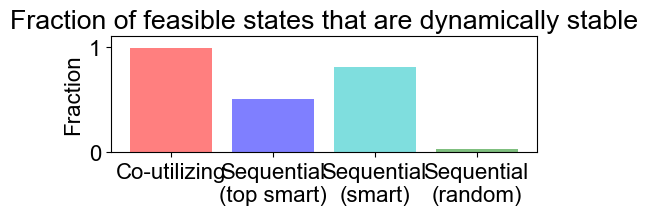

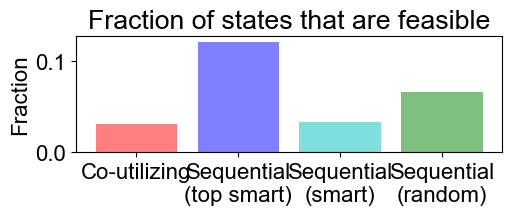

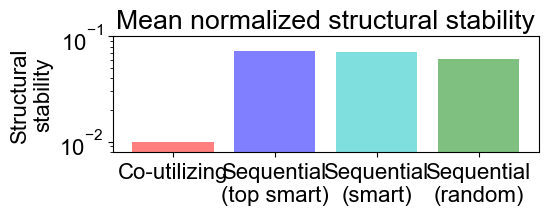

In [18]:
# A barplot of "fraction of dynamically stable" at nR=6
# 
fractions = [data["cout_hwa"][0][-1][1]/data["cout_hwa"][0][-1][0],
             data["semismart_diaux_hwa"][0][-1][1]/data["semismart_diaux_hwa"][0][-1][0], 
             data["smart_diaux_hwa"][0][-1][1]/data["smart_diaux_hwa"][0][-1][0], 
             data["random_diaux_hwa"][0][-1][1]/data["random_diaux_hwa"][0][-1][0]]
colors = ['r', 'b', 'c', 'g']
fig, ax = plt.subplots()
ax.figure.set_size_inches(5.5, 1.5)
bars = ax.bar(range(4), fractions, color=colors, alpha=0.5)
ax.set_xticklabels([0, "Co-utilizing", "Sequential\n(top smart)", "Sequential\n(smart)", "Sequential\n(random)"])
ax.set_ylabel("Fraction")
ax.set_title("Fraction of feasible states that are dynamically stable")
ax.set_ylim(0, 1.1)
print(fractions)
plt.savefig("figs/dyn_stable_fractions_hwa.pdf",bbox_inches = 'tight')


fractions = [data["cout_hwa"][0][-1][0],
             data["semismart_diaux_hwa"][0][-1][0], 
             data["smart_diaux_hwa"][0][-1][0], 
             data["random_diaux_hwa"][0][-1][0]]
colors = ['r', 'b', 'c', 'g']
fig, ax = plt.subplots()
ax.figure.set_size_inches(5.5, 1.5)
bars = ax.bar(range(4), fractions, color=colors, alpha=0.5)
ax.set_xticklabels([0, "Co-utilizing", "Sequential\n(top smart)", "Sequential\n(smart)", "Sequential\n(random)"])
ax.set_ylabel("Fraction")
ax.set_title("Fraction of states that are feasible")
plt.savefig("figs/feas_fractions_hwa.pdf",bbox_inches = 'tight')


stability = [10**data["cout_hwa"][1][-1][0],
             10**data["semismart_diaux_hwa"][1][-1][0], 
             10**data["smart_diaux_hwa"][1][-1][0], 
             10**data["random_diaux_hwa"][1][-1][0]]
colors = ['r', 'b', 'c', 'g']
fig, ax = plt.subplots()
ax.figure.set_size_inches(5.5, 1.5)
bars = ax.bar(range(4), stability, color=colors, alpha=0.5)
ax.set_xticklabels([0, "Co-utilizing", "Sequential\n(top smart)", "Sequential\n(smart)", "Sequential\n(random)"])
ax.set_ylabel("Structural\nstability")
ax.set_title("Mean normalized structural stability")
ax.set_yscale("log")
ax.set_ylim(8e-3, 1e-1)
plt.savefig("figs/feas_stab_hwa.pdf",bbox_inches = 'tight')

[-0.0002606548934319938, 0.041234731171430825, 0.10585067438514352, 0.20237932107962348, 0.2876226024861922] [-1.2313694878704438, -1.178019496040696, -1.1511849724044176, -1.157711583018281, -1.143600115754123]
[0.0005208409361856701, -0.019542107723899943, -0.05354773498692691, -0.06752623532284678, -0.07489427319033615] [-1.2445596020261596, -1.2025029726329963, -1.1956283999227548, -1.1643052174770805, -1.1445058262460224]
[-0.1032533843925944, -0.30416822717330777, -0.5310621943345387, -0.7624562618571255, -1.1726307269461749] [-1.5601715325861125, -1.4423717984565156, -1.383536888059585, -1.361031203983752, -1.2106846814925991]
[0.006722692201684641, 0.015359755409214231, 0.006893707947900456, 0.0, -0.01628352608625069] [-1.8200799525995934, -1.893021165101588, -1.9370160821433449, -1.9818543924643688, -2.0036110310285338]


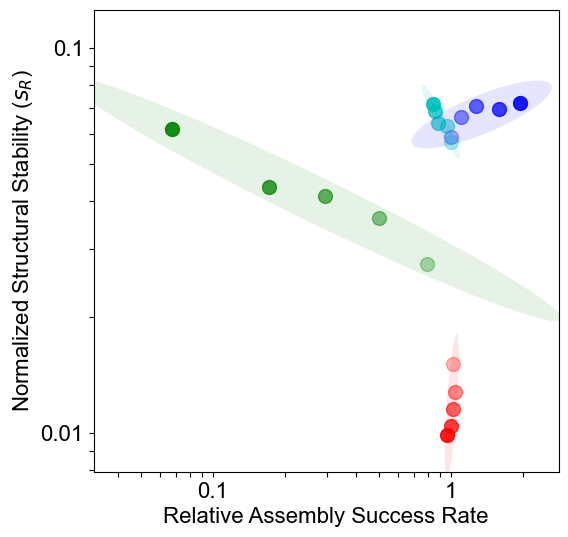

In [20]:
from matplotlib.patches import Ellipse
import matplotlib as mpl

alpha_list = np.arange(0.3, 1, 0.15)
color_list = ['b', 'c', "g","r"]
keys_list = ["semismart_diaux_hwa", "smart_diaux_hwa", "random_diaux_hwa", "cout_hwa"]
legend_list = ["Sequential - top smart", "Sequential - smart", "Sequential - random", "Co-utilizing"]
# color_list = ['b', 'c', 'r']
# keys_list = ["smart_diaux_hwa", "semismart_diaux_hwa", "cout_hwa"]
# legend_list = ["", "", ""]

# plt.rcParams["figure.figsize"] = [5, 6]
fig, ax1 = plt.subplots()
ax1.figure.set_size_inches(6, 6)

for k_ind, k in enumerate(keys_list):
    for i in range(4):
        normalized_assembly = log10(data[k][0][i][1]*(2**(i+1)))
        stability = data[k][1][i][0]
        err = data[k][1][i][1]
        ax1.scatter(normalized_assembly, stability, marker='o', 
                     s = 100, alpha = alpha_list[i], color=color_list[k_ind])
    for i in range(4, 5):
        normalized_assembly = log10(data[k][0][i][1]*(2**(i+1)))
        stability = data[k][1][i][0]
        err = data[k][1][i][1]
        ax1.scatter(normalized_assembly, stability, marker='o', 
                     s = 100, alpha = alpha_list[i], color=color_list[k_ind], label=legend_list[k_ind])

for i, key in enumerate(keys_list):
    x_group, y_group = [log10(i[1]*(2**(index+1))) for index, i in enumerate(data[key][0])], [i[0] for i in data[key][1]]
    print(x_group, y_group)
    center = np.mean([x_group, y_group], axis=1)
    cov_matrix = np.cov(x_group, y_group)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
    width, height = 5*np.sqrt(eigenvalues)
    ellipse = Ellipse(center, width, height, angle=angle, facecolor=color_list[i], alpha=0.1)
    ax1.add_patch(ellipse)

xlo, xhi, ylo, yhi = -1.5, 0.45, -2.1, -0.9
ax1.set_xlim(xlo, xhi)
ax1.set_ylim(ylo, yhi)
a, b = ticking(xlo, xhi)
ax1.set_xticks(a, b)
a, b = ticking(ylo, yhi)
ax1.set_yticks(a, b)
# ax1.set_xticks([-1, -0.5, 0], ["$10^{-1}$", "$10^{-0.5}$", "$10^0$"])
# ax1.set_yticks([-1, -1.5, -2], ["$10^{-1}$", "$10^{-1.5}$", "$10^{-2}$"])
# plt.legend()
ax1.set_xlabel("Relative Assembly Success Rate")
ax1.set_ylabel("Normalized Structural Stability ($s_R$)")
# ax1.legend()
plt.savefig("figs/div_vs_stability_4_strategies.pdf",bbox_inches = 'tight')